In [439]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns
from scipy.stats import norm
import scipy as sp

Генерируем выборку:

In [440]:
n = 25

sample = np.random.exponential(scale=1, size=n) 

print("Выборка:", sample)

Выборка: [1.53871009 2.26211947 0.02929134 1.17934363 0.79197582 1.21221607
 0.71402208 0.75032939 0.90661128 0.03039677 0.04072804 0.03931355
 0.54796319 2.28536584 0.28947182 0.54422612 0.0148425  0.11434203
 0.57056181 0.38948095 0.20620314 1.05558126 1.9853091  1.49933364
 0.60610917]


a)

In [441]:
# мода
values, counts= np.unique(sample, return_counts=True)
mode = values[np.argmax(counts)]
print("Мода: ", mode)

#медиана
median = np.median(sample)
print("Медиана: ", median)

#размах
data_range = np.max(sample) - np.min(sample)
print("Размах: ", data_range)

#оценка коэф. асимметрии
skewness = stats.skew(sample)
print("Коэффициент асимметрии: ", skewness)

Мода:  0.014842496645141402
Медиана:  0.6061091677246633
Размах:  2.2705233423486795
Коэффициент асимметрии:  0.8149705798186416


b)

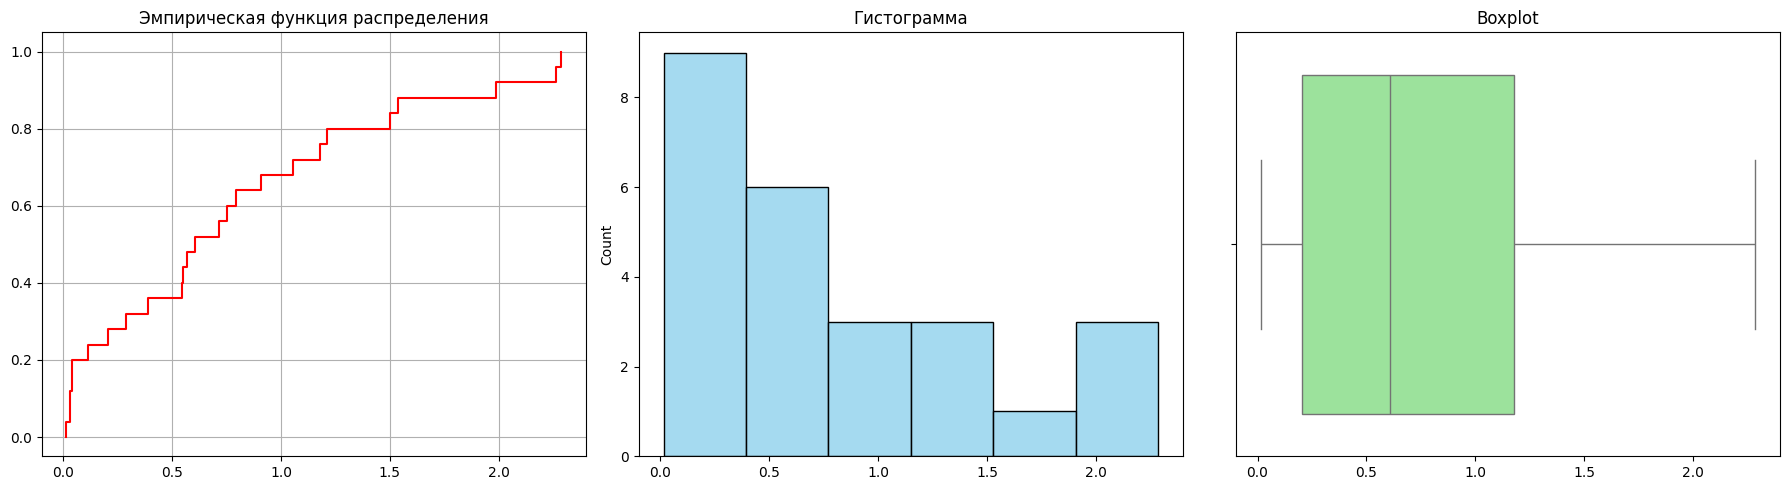

In [442]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#Эмпирическая функция распределения
ecdf = ECDF(sample)
axes[0].step(ecdf.x, ecdf.y, where='post', color='red', label='ECDF')
axes[0].set_title('Эмпирическая функция распределения')
axes[0].grid(True)

#Гистограмма
sns.histplot(sample, kde=False, ax=axes[1], color='skyblue', edgecolor='black', bins=int(math.ceil(1 + np.log2(n))))
axes[1].set_title('Гистограмма')

#Boxplot
sns.boxplot(x=sample, ax=axes[2], color='lightgreen')
axes[2].set_title('Boxplot')

plt.tight_layout()
plt.show()

c)

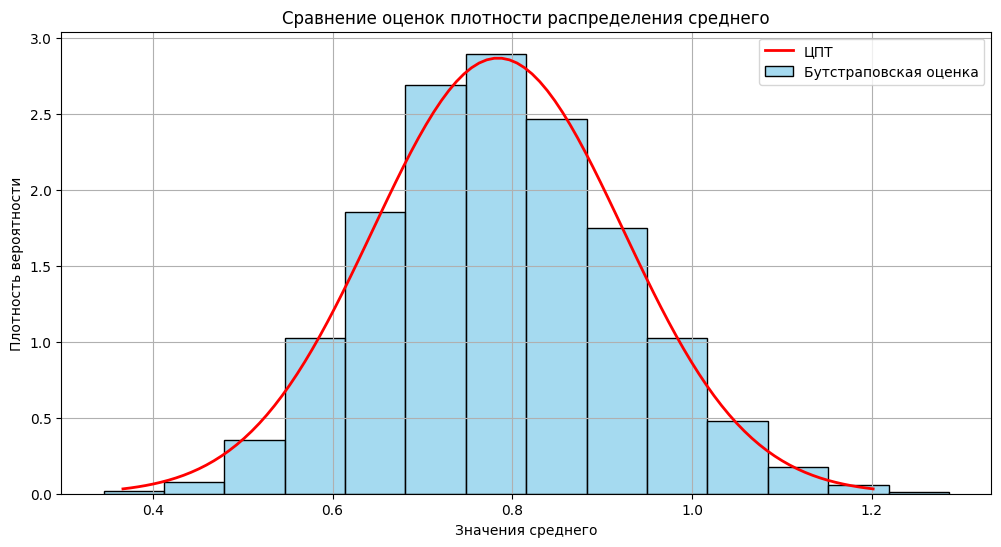

In [443]:
# Параметры для ЦПТ
mu = np.mean(sample)
sem = np.std(sample, ddof=1) / np.sqrt(len(sample))

# Бутстраповская оценка
n_bootstrap = 10000
bootstrap_means = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)


plt.figure(figsize=(12, 6))

# Гистограмма бутстраповской оценки
sns.histplot(bootstrap_means, 
             kde=False, 
             stat='density', 
             color='skyblue', 
             label='Бутстраповская оценка', bins= 1+ int(np.log2(n_bootstrap)))

# ЦПТ
x = np.linspace(mu - 3*sem, mu + 3*sem, 100)
plt.plot(x, norm.pdf(x, mu, sem), 
         color='red', 
         linewidth=2, 
         label='ЦПТ')

plt.title('Сравнение оценок плотности распределения среднего')
plt.xlabel('Значения среднего')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

d)

Вероятность того, что коэффициент асимметрии меньше 1: 0.7616


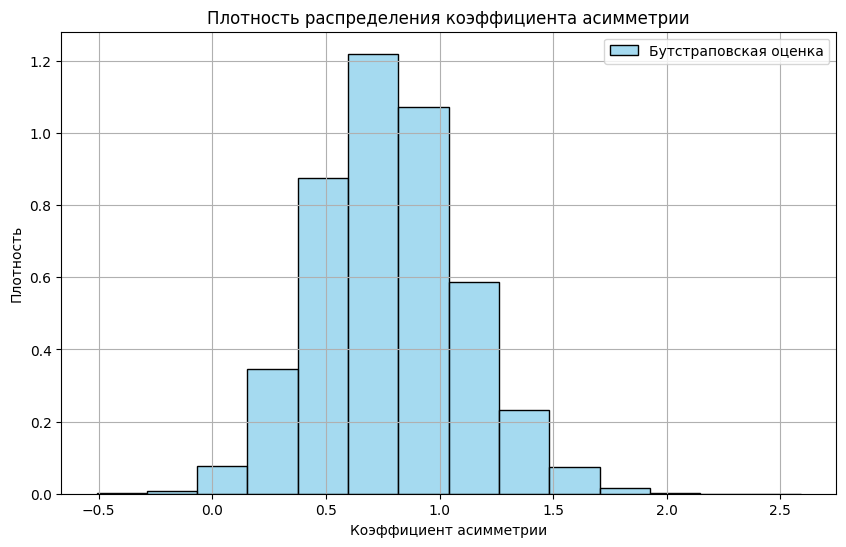

In [444]:
n_bootstrap = 10000
bootstrap_skewnesses = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    bootstrap_skewnesses[i] = stats.skew(bootstrap_sample)


probability = np.mean(bootstrap_skewnesses < 1)
print(f"Вероятность того, что коэффициент асимметрии меньше 1: {probability:.4f}")
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_skewnesses, 
             kde=False, 
             stat='density', 
             color='skyblue', 
             label='Бутстраповская оценка', bins= 1+ int(np.log2(n_bootstrap)))
plt.title('Плотность распределения коэффициента асимметрии')
plt.xlabel('Коэффициент асимметрии')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()


e)

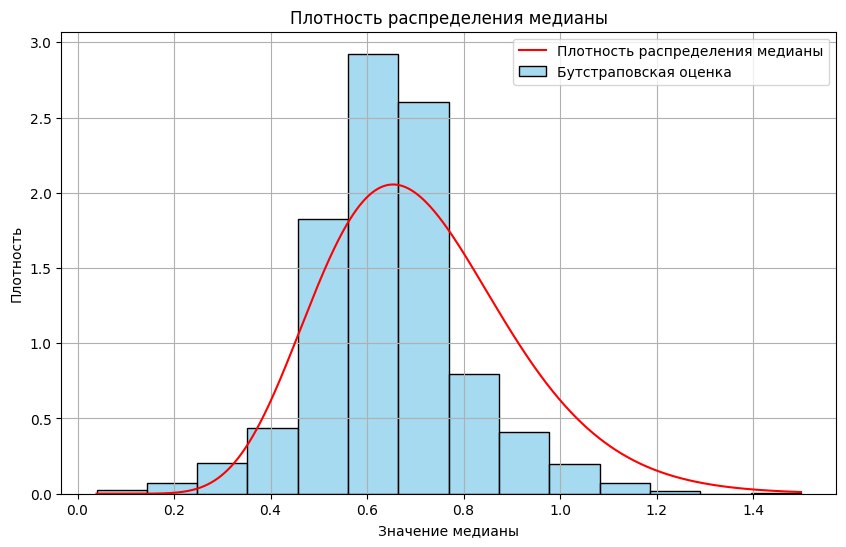

In [445]:
n_bootstrap = 10000
bootstrap_medians = np.zeros(n_bootstrap)
for i in range(n_bootstrap):
    resample = np.random.choice(sample, size=n, replace=True)
    bootstrap_medians[i] = np.median(resample)


median_x = np.linspace(min(bootstrap_medians), max(bootstrap_medians), n_bootstrap)
def func(x):
    return 25* np.exp(-x) * sp.special.comb(24, 12)* ((np.exp(-x))**(12)) * ((1 - np.exp(-x))**(12))


plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_medians, 
             kde=False, 
             stat='density', 
             color='skyblue', 
             label='Бутстраповская оценка', bins= 1+ int(np.log2(n_bootstrap)))

plt.plot(median_x, [func(m) for m in median_x], label="Плотность распределения медианы", color= "red")
plt.title('Плотность распределения медианы')
plt.xlabel('Значение медианы')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()